In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# Define the normal distribution

In [2]:
def normal_distribution(x, μ, σ):
    '''
    x = some array or scalar
    μ = mean
    σ = standard deviation
    '''
    return (1 / np.sqrt(2*np.pi)) * np.exp(-(1/2) * (x - μ)**2 / σ**2)

# Make data. Consider only two classes first.

<IPython.core.display.Javascript object>


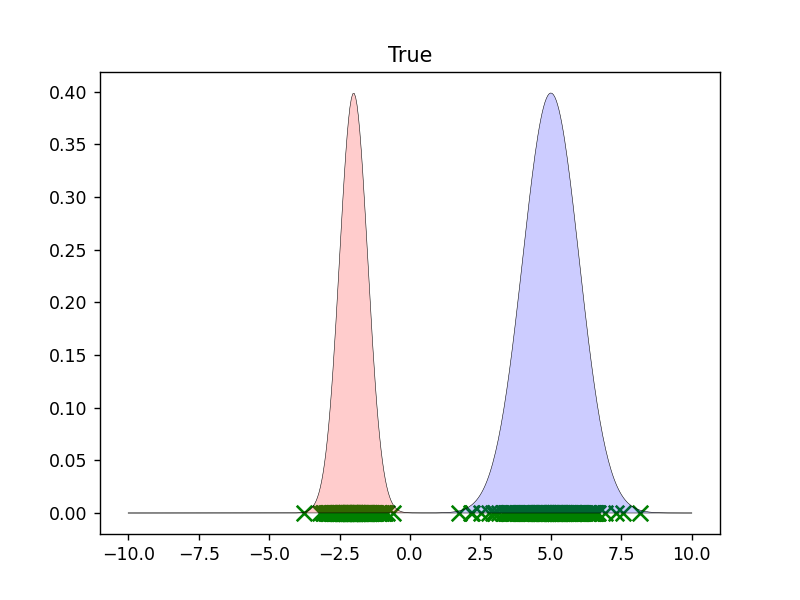

Text(0.5, 1.0, 'True')

In [3]:
n_total_points_per_class = 200

μ0, σ0 = -2, .5 # Class 0 mean and std dev
μ1, σ1 = 5, 1  # Class 1

X = np.hstack((np.random.normal(μ0, σ0, n_total_points_per_class), np.random.normal(μ1, σ1, n_total_points_per_class)))
np.random.shuffle(X)

plt.figure()
plt.scatter(X, np.zeros(len(X)), marker='x', s=80, c='Green')

xs = np.linspace(-10,10,400)
plt.plot(xs, normal_distribution(xs, μ0, σ0), 'k', lw=0.3)
plt.plot(xs, normal_distribution(xs, μ1, σ1), 'k', lw=0.3)
plt.fill_between(xs,normal_distribution(xs, μ0, σ0), facecolor=(1,0,0,.2))
plt.fill_between(xs,normal_distribution(xs, μ1, σ1), facecolor=(0,0,1,.2))
plt.title("True")

# Expectation-Maximization Algorithm

### Define two Gaussians (the likelihood of z=0 and z=1)

<IPython.core.display.Javascript object>


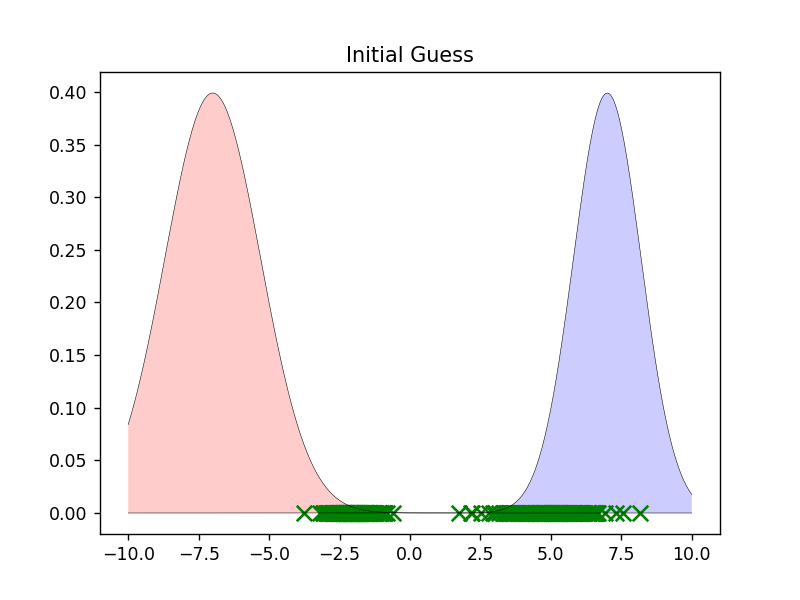

Text(0.5, 1.0, 'Initial Guess')

In [4]:
μ = np.array([-7, 7]) # Means (location of the initial Gaussians)
σ = np.array([1.7, 1.2]) # Standard deviation 
k = len(μ) # Number of user-defined clusters

plt.figure()
xs = np.linspace(-10,10,400)
plt.plot(xs, normal_distribution(xs, μ[0], σ[0]), 'k', lw=0.3)
plt.plot(xs, normal_distribution(xs, μ[1], σ[1]), 'k', lw=0.3)
plt.fill_between(xs,normal_distribution(xs, μ[0], σ[0]), facecolor=(1,0,0,.2))
plt.fill_between(xs,normal_distribution(xs, μ[1], σ[1]), facecolor=(0,0,1,.2))
plt.scatter(X, np.zeros(len(X)), marker='x', s=80, c='Green')
plt.title('Initial Guess')

In [5]:
# Makes the initial clustering
likelihood = np.array([[normal_distribution(X_i, μ[i], σ[i]) for i in range(len(μ))] for X_i in X])
z = np.array([np.argmax(i) for i in likelihood]) # assigns the classes.

w = np.zeros((len(X), k))
for iteration in range(100):
    for i, X_i in enumerate(X):
        w_j = np.zeros(k)
        for j in range(len(np.unique(z))):
            w_j[j] = normal_distribution(X_i, μ[j], σ[j]) * (np.sum((z==z[i])) / len(z)) / np.sum([normal_distribution(X_i, μ[l], σ[l])* (np.sum((z==z[l])) / len(z)) for l in range(k)])

        w[i] = w_j
        
    # Maximization step
    μ = np.array([w.T[j]@X / np.sum(w.T[j]) for j in range(k)])
    σ = np.sqrt(np.array([np.sum(w.T[j]*(X - μ[j])**2) / np.sum(w.T[j]) for j in range(k)]))
    
    # Updates the classifications of the points
    likelihood = np.array([[normal_distribution(X_i, μ[i], σ[i]) for i in range(len(μ))] for X_i in X])
    z = np.array([np.argmax(i) for i in likelihood])
    
print(μ, σ)

[-2.02183872  4.93664305] [0.53851083 1.04146069]


### Finds the final classification of the points

# Plot the results

<IPython.core.display.Javascript object>


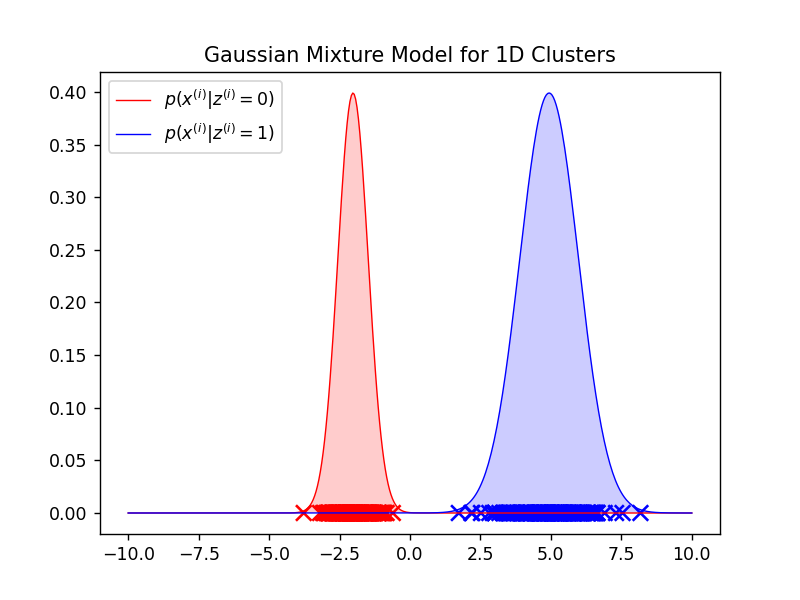

In [6]:
plt.figure()

xs = np.linspace(-10,10,400)

plt.plot(xs, normal_distribution(xs, μ[0], σ[0]), 'red', lw=0.8, label=r"$p(x^{(i)}|z^{(i)}=0)$")
plt.plot(xs, normal_distribution(xs, μ[1], σ[1]), 'blue', lw=0.8, label=r"$p(x^{(i)}|z^{(i)}=1)$")

plt.fill_between(xs,normal_distribution(xs, μ[0], σ[0]), facecolor=(1,0,0,.2))
plt.fill_between(xs,normal_distribution(xs, μ[1], σ[1]), facecolor=(0,0,1,.2))

plt.scatter(X, np.zeros(len(X)), marker='x', s=80, c=['Red' if i==0 else 'Blue' for i in z])
plt.title("Gaussian Mixture Model for 1D Clusters")
plt.legend()